In [1]:
from pymongo import MongoClient
import pandas as pd
import numpy as np

client = MongoClient("mongodb://localhost:27017/")
db = client["MOOC"]
collection = db["forum"]

# Liste pour accumuler les données filtrées
rows = []

# Traitement en lot
batch_size = 1000
cursor = collection.find({"course_id":"MinesTelecom/04017/session01"}, no_cursor_timeout=True).batch_size(batch_size)

for doc in cursor:
    content = doc.get("content", {})
    rows.append({
        "_id": doc.get("_id"),
        "titre": content.get("title"),
        "titre_sujet": content.get("courseware_title"),
        "Nom_du_cours": content.get("course_id"),
        "contenu_message": content.get("body"),
        "username": content.get("username"),
        "votes": content.get("votes", {}).get("count", 0),
        "comments_count": content.get("comments_count", 0),
        "created_at": content.get("created_at"),
    })


df = pd.DataFrame(rows)
df.head()


/home/maximilien/Documents/Formation DATA IA/Projet-MOOC/env/lib/python3.12/site-packages/pymongo/synchronous/collection.py:1945: UserWarning: use an explicit session with no_cursor_timeout=True otherwise the cursor may still timeout after 30 minutes, for more info see https://mongodb.com/docs/v4.4/reference/method/cursor.noCursorTimeout/#session-idle-timeout-overrides-nocursortimeout
  return Cursor(self, *args, **kwargs)


,_id,titre,titre_sujet,Nom_du_cours,contenu_message,username,votes,comments_count,created_at
0,52ef4b71ab137b00720007d4,Jeune Ingénieur,Entre nous / Presentez-vous,CNAM/01002/Trimestre_1_2014,Dans le cadre de mes études d'ingénieur j'ai é...,qb,1,1,2014-02-03T07:55:29Z
1,52ef4d79b4907d2e23000996,Appronfondir mes connaissances,Entre nous / Presentez-vous,CNAM/01002/Trimestre_1_2014,"Bonjour,\nje suis actuellement une formation d...",fidji,0,3,2014-02-03T08:04:09Z
2,52ef4f99344caaf903000158,Motivations d'une archiviste enseignante,Entre nous / Presentez-vous,CNAM/01002/Trimestre_1_2014,Bonjour à tous (et je crois que nous sommes no...,ambruleaux,1,1,2014-02-03T08:13:13Z
3,52ef50b5cfc81d7e4100090e,Ancien Manager et Patron,Entre nous / Presentez-vous,CNAM/01002/Trimestre_1_2014,"Bonjour, j'ai eu une expérience de Manager de ...",EricBouchet,2,1,2014-02-03T08:17:57Z
4,52ef565b4b4451380f0008b2,Apprendre,Semaine_1 / Definition,CNAM/01002/Trimestre_1_2014,Je retiens que le manager peut jouer plusieurs...,edwigedk,3,3,2014-02-03T08:42:03Z


In [2]:
df["titre_sujet"].value_counts().head(15)

titre_sujet
Week 1 / Are you involved in a project                         4595
A vous de vous présenter / Présentations                       3176
Week 2 / The initiation process                                2430
Discussion / Week 1: Favorite Applications                     1758
Bienvenue / Présentez-vous                                     1741
Week 3 / Project Planning                                      1404
Week 5 / Communication tools                                   1100
Week 1 / Pre-Assignment Discussion: Introductions              1096
Welcome / Introduce yourself                                   1033
Entre nous / Presentez-vous / introduce yourself               1019
Week 4 / Significant risk                                      1011
Introduction / Présentez-vous                                   795
4 - Activités - Echanges & Débats / S0- A propos de vous...     721
Pour débuter / Présentation                                     679
Présentations / Présentez-vous      

In [3]:
df["titre"].value_counts().head(5)

titre
Présentation    3774
Peter            709
Introduction     689
Bonjour          671
Anne             626
Name: count, dtype: int64

In [4]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
embeddings = model.encode(df['contenu_message'].fillna(""), show_progress_bar=True)


/home/maximilien/Documents/Formation DATA IA/Projet-MOOC/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|██████████████████████████████████████████████████████████████| 2302/2302 [22:48<00:00,  1.68it/s]


In [5]:
df.head()

,_id,titre,titre_sujet,Nom_du_cours,contenu_message,username,votes,comments_count,created_at
0,52ef4b71ab137b00720007d4,Jeune Ingénieur,Entre nous / Presentez-vous,CNAM/01002/Trimestre_1_2014,Dans le cadre de mes études d'ingénieur j'ai é...,qb,1,1,2014-02-03T07:55:29Z
1,52ef4d79b4907d2e23000996,Appronfondir mes connaissances,Entre nous / Presentez-vous,CNAM/01002/Trimestre_1_2014,"Bonjour,\nje suis actuellement une formation d...",fidji,0,3,2014-02-03T08:04:09Z
2,52ef4f99344caaf903000158,Motivations d'une archiviste enseignante,Entre nous / Presentez-vous,CNAM/01002/Trimestre_1_2014,Bonjour à tous (et je crois que nous sommes no...,ambruleaux,1,1,2014-02-03T08:13:13Z
3,52ef50b5cfc81d7e4100090e,Ancien Manager et Patron,Entre nous / Presentez-vous,CNAM/01002/Trimestre_1_2014,"Bonjour, j'ai eu une expérience de Manager de ...",EricBouchet,2,1,2014-02-03T08:17:57Z
4,52ef565b4b4451380f0008b2,Apprendre,Semaine_1 / Definition,CNAM/01002/Trimestre_1_2014,Je retiens que le manager peut jouer plusieurs...,edwigedk,3,3,2014-02-03T08:42:03Z


In [10]:
import pandas as pd

embedding_df = pd.DataFrame(embeddings)
embedding_df.head(5) 

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.087094,0.215719,0.067435,0.026551,0.012171,-0.133490,0.113882,0.184811,-0.109155,-0.127696,...,0.180526,0.464945,0.151970,-0.084546,-0.236108,0.143696,-0.273237,0.214096,-0.302618,-0.008335
1,0.129202,0.071930,0.115151,0.129354,-0.019601,-0.079803,0.044457,-0.015824,-0.095016,-0.126899,...,0.196160,0.332218,0.193816,-0.103677,-0.156417,0.092016,0.041653,0.105565,-0.287855,-0.083505
2,-0.057212,0.100228,-0.103174,-0.070914,-0.019953,-0.105679,-0.037400,0.148171,-0.121004,0.072890,...,0.260898,0.307102,0.090114,-0.300478,-0.176024,0.313096,-0.045328,0.173167,-0.183348,-0.143471
3,0.156200,0.124683,0.082386,0.062241,-0.239254,-0.258956,0.245489,-0.006527,-0.215469,-0.192771,...,0.243552,0.270132,0.291582,-0.200848,-0.001173,-0.095216,0.018030,0.133403,-0.177489,-0.025535
4,0.153868,-0.158002,0.240530,-0.019771,-0.083438,0.086692,0.245995,-0.014867,0.050890,-0.205622,...,0.048353,0.185536,0.405098,-0.105326,0.007975,0.075362,-0.067954,0.121182,0.012420,0.119133


Détermination du nombre de n_clusters

In [14]:
from sklearn.metrics import silhouette_score
for k in range(2, 20):
    km = KMeans(n_clusters=k, random_state=42).fit(embeddings)
    score = silhouette_score(embeddings, km.labels_)
    print(f"Clusters: {k}, Silhouette score: {score:.3f}")


Clusters: 2, Silhouette score: 0.058
Clusters: 3, Silhouette score: 0.059
Clusters: 4, Silhouette score: 0.059
Clusters: 5, Silhouette score: 0.037
Clusters: 6, Silhouette score: 0.037
Clusters: 7, Silhouette score: 0.033
Clusters: 8, Silhouette score: 0.039
Clusters: 9, Silhouette score: 0.040
Clusters: 10, Silhouette score: 0.031
Clusters: 11, Silhouette score: 0.035
Clusters: 12, Silhouette score: 0.035
Clusters: 13, Silhouette score: 0.033
Clusters: 14, Silhouette score: 0.035
Clusters: 15, Silhouette score: 0.038
Clusters: 16, Silhouette score: 0.036
Clusters: 17, Silhouette score: 0.037
Clusters: 18, Silhouette score: 0.038
Clusters: 19, Silhouette score: 0.035


Le score le plus élevé bien que faible est 4. 

In [44]:
from sklearn.cluster import KMeans

n_clusters = 4 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(embeddings)

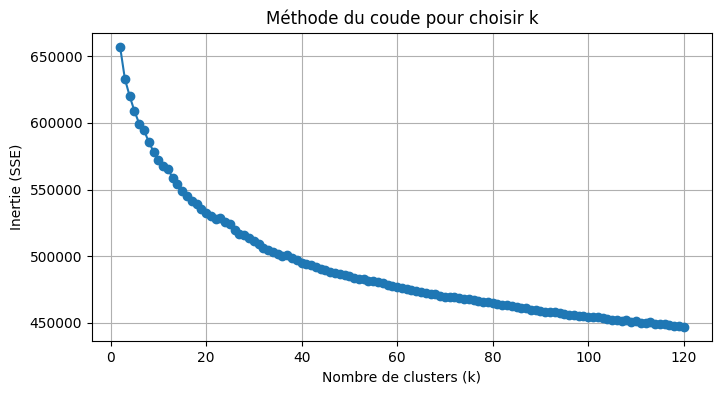

In [45]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Choix du nombre max de clusters à tester
max_k = 120
inertias = []

# Calcul de l'inertie pour chaque valeur de k
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    inertias.append(kmeans.inertia_)

# Tracé du coude
plt.figure(figsize=(8, 4))
plt.plot(range(2, max_k + 1), inertias, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (SSE)')
plt.title('Méthode du coude pour choisir k')
plt.grid(True)
plt.show()


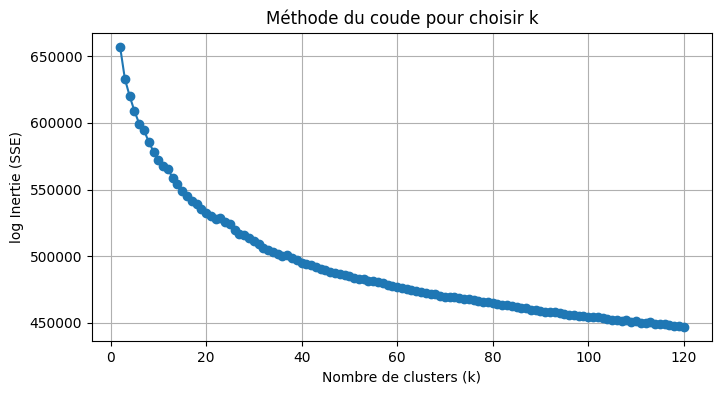

In [46]:
# Tracé du coude
inertias2 = np.log(inertias)
plt.figure(figsize=(8, 4))
plt.plot(range(2, max_k + 1), inertias, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('log Inertie (SSE)')
plt.title('Méthode du coude pour choisir k')
plt.grid(True)
plt.show()

In [47]:

graph = np.diff(inertias)


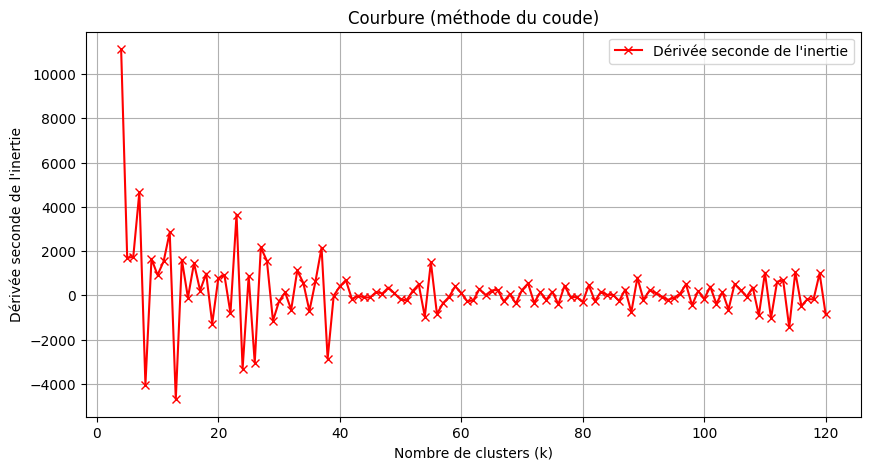

In [48]:
# 1. Calcul des dérivées
first_derivative = np.diff(inertias)
second_derivative = np.diff(first_derivative)

# 2. Définir l'axe x correspondant
x_second_derivative = range(4, max_k + 1)  # Commence à 4 car on a retiré deux valeurs

# 3. Tracer la courbe
plt.figure(figsize=(10, 5))
plt.plot(x_second_derivative, second_derivative, marker='x', color='red', label="Dérivée seconde de l'inertie")
plt.xlabel('Nombre de clusters (k)')
plt.ylabel("Dérivée seconde de l'inertie")
plt.title("Courbure (méthode du coude)")
plt.grid(True)
plt.legend()
plt.show()


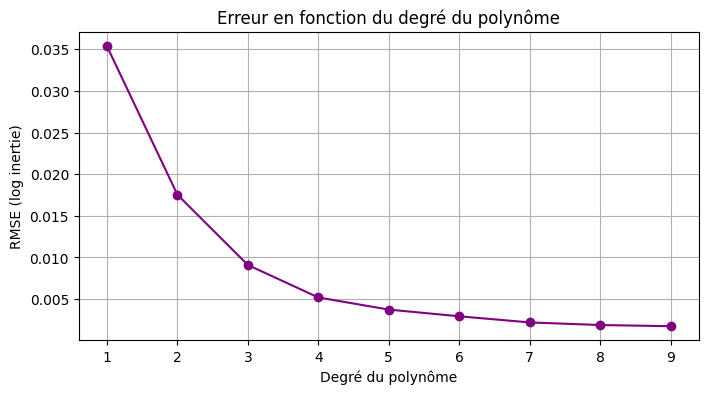

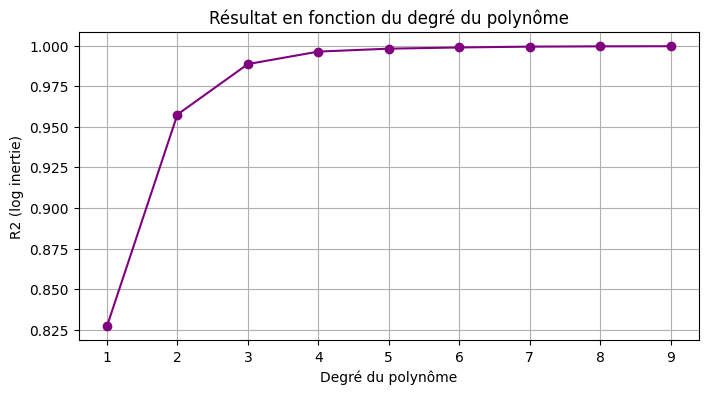

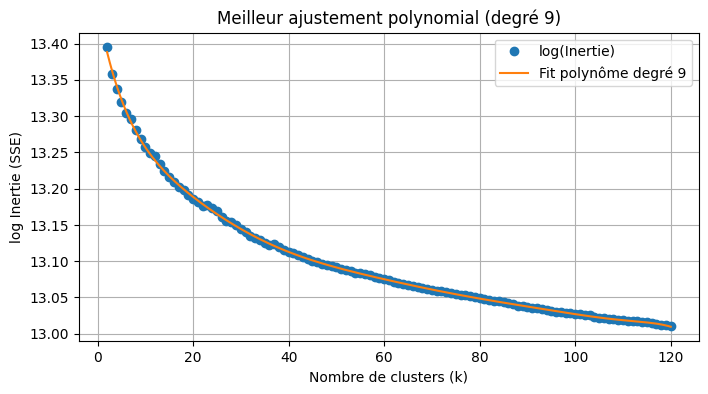

✅ Meilleur degré : 9 avec RMSE = 0.0017


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score

# Tes données
xdata = np.arange(2, max_k + 1)
ydata = np.log(inertias)  # ou inertias si tu préfères en échelle linéaire

y_pred = poly_func(xdata, *params)

# Fonction génératrice de polynômes
def poly_func(x, *coeffs):
    return sum(c * x**i for i, c in enumerate(coeffs))

# Comparaison sur plusieurs degrés
degrees = range(1, 10)  # degré 1 à 6
rmse_scores = []
r2_scores = []
fits = {}

for deg in degrees:
    p0 = np.ones(deg + 1)  # initial guess
    params, _ = curve_fit(lambda x, *p: poly_func(x, *p), xdata, ydata, p0=p0)
    y_pred = poly_func(xdata, *params)
    rmse = np.sqrt(np.mean((ydata - y_pred) ** 2))
    rmse_scores.append(rmse)
    r2 = r2_score(ydata, y_pred)
    r2_scores.append(r2)
    fits[deg] = (params, y_pred)

# Afficher l'erreur par degré
plt.figure(figsize=(8, 4))
plt.plot(degrees, rmse_scores, marker='o', color='purple')
plt.xlabel('Degré du polynôme')
plt.ylabel('RMSE (log inertie)')
plt.title('Erreur en fonction du degré du polynôme')
plt.grid(True)
plt.show()

# Afficher le r² par degré
plt.figure(figsize=(8, 4))
plt.plot(degrees, r2_scores, marker='o', color='purple')
plt.xlabel('Degré du polynôme')
plt.ylabel('R2 (log inertie)')
plt.title('Résultat en fonction du degré du polynôme')
plt.grid(True)
plt.show()

# Tracer le meilleur fit
best_deg = degrees[np.argmin(rmse_scores)]
best_params, _ = fits[best_deg]
x_fit = np.linspace(min(xdata), max(xdata), 200)
y_fit = poly_func(x_fit, *best_params)

plt.figure(figsize=(8, 4))
plt.plot(xdata, ydata, 'o', label='log(Inertie)')
plt.plot(x_fit, y_fit, '-', label=f'Fit polynôme degré {best_deg}')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('log Inertie (SSE)')
plt.title(f'Meilleur ajustement polynomial (degré {best_deg})')
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ Meilleur degré : {best_deg} avec RMSE = {min(rmse_scores):.4f}")


Paramètres : a = 0.222192, b = 0.095413, c = 13.200928, d = -0.002628, e = 0.00000884
RMSE : 0.002730
Le k optimal estimé par la dérivée troisième est : 2.00
Le k optimal estimé par la courbure normalisée est : 2.00
Paramètres du modèle :
a = 0.222192 (amplitude exponentielle)
b = 0.095413 (taux de décroissance)
c = 13.200928 (offset)
d = -0.002628 (terme linéaire)
e = 0.00000884 (terme quadratique)
RMSE global : 0.002730
Erreur maximale : 0.016365
Erreur minimale : 0.000046
Erreur moyenne : 0.001789


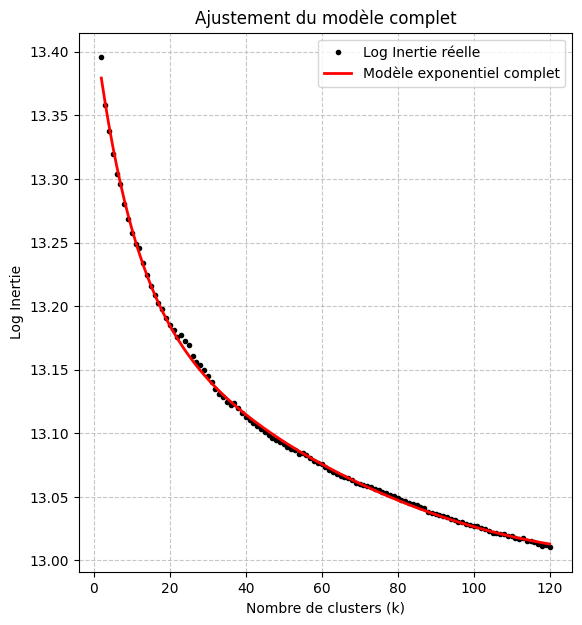

In [66]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

max_k = 120
xdata = np.array(range(2, max_k + 1))
ydata = log_inertias  # On travaille directement avec log_inertias

# Définition du modèle exponentiel décroissant avec termes linéaire et quadratique
def exp_decreasing(x, a, b, c, d, e):
    return a * np.exp(-b * x) + c + d*x + e*x*x

p0 = [0.5, 0.1, 13.0, -0.001, 0.00001]  # Valeurs initiales pour (a, b, c, d, e)
params, covariance = curve_fit(exp_decreasing, xdata, ydata, p0=p0, maxfev=10000)

# Extraction des paramètres
a, b, c, d, e = params
print(f"Paramètres : a = {a:.6f}, b = {b:.6f}, c = {c:.6f}, d = {d:.6f}, e = {e:.8f}")

# Prédiction avec le modèle ajusté
y_pred = exp_decreasing(xdata, *params)

# Calcul de l'erreur quadratique moyenne
rmse = np.sqrt(np.mean((ydata - y_pred)**2))
print(f"RMSE : {rmse:.6f}")

# Visualisation
plt.figure(figsize=(14, 7))

# Graphique principal
plt.subplot(1, 2, 1)
plt.plot(xdata, ydata, 'ko', markersize=3, label='Log Inertie réelle')
plt.plot(xdata, y_pred, 'r-', linewidth=2, label='Modèle exponentiel complet')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Log Inertie')
plt.title('Ajustement du modèle complet')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)



# Analyse pour déterminer le k optimal
# Calcul des dérivées du modèle
def exp_decreasing_derivative(x, a, b, c, d, e):
    return -a * b * np.exp(-b * x) + d + 2*e*x

# Calculer la dérivée pour identifier le coude
x_fine = np.linspace(2, max_k, 1000)
y_fine = exp_decreasing(x_fine, *params)
derivative = exp_decreasing_derivative(x_fine, *params)

# Calcul de la dérivée seconde pour identifier le coude
def exp_decreasing_second_derivative(x, a, b, c, d, e):
    return a * b * b * np.exp(-b * x) + 2*e

second_derivative = exp_decreasing_second_derivative(x_fine, *params)

def exp_decreasing_third_derivative(x, a, b, c, d, e):
    return -a * b * b * b * np.exp(-b * x)

third_derivative = exp_decreasing_third_derivative(x_fine, *params)

max_third_deriv_idx = np.argmax(np.abs(third_derivative))
k_optimal = x_fine[max_third_deriv_idx]

def normalized_curvature(x, a, b, c, d, e):
    first_deriv = -a * b * np.exp(-b * x) + d + 2*e*x
    second_deriv = a * b * b * np.exp(-b * x) + 2*e
    return np.abs(second_deriv) / (1 + first_deriv**2)**1.5

curvature = normalized_curvature(x_fine, *params)

max_curvature_idx = np.argmax(curvature)
k_optimal_curvature = x_fine[max_curvature_idx]



print(f"Le k optimal estimé par la dérivée troisième est : {k_optimal:.2f}")
print(f"Le k optimal estimé par la courbure normalisée est : {k_optimal_curvature:.2f}")
print(f"Paramètres du modèle :")
print(f"a = {a:.6f} (amplitude exponentielle)")
print(f"b = {b:.6f} (taux de décroissance)")
print(f"c = {c:.6f} (offset)")
print(f"d = {d:.6f} (terme linéaire)")
print(f"e = {e:.8f} (terme quadratique)")

k_values = np.linspace(2, max_k, 1000)
exp_component = a * np.exp(-b * k_values)
linear_component = d * k_values
quadratic_component = e * k_values * k_values
constant_component = c

error = ydata - y_pred
rmse_by_point = np.sqrt(error**2)


print(f"RMSE global : {rmse:.6f}")
print(f"Erreur maximale : {np.max(rmse_by_point):.6f}")
print(f"Erreur minimale : {np.min(rmse_by_point):.6f}")
print(f"Erreur moyenne : {np.mean(rmse_by_point):.6f}")

OK, cela nous convient ! On prend donc le paramètre b qui est de 0.095413

$$f(t) = a e^{-b x } + c + d x + e x²$$
$$n_{cluster} = \dfrac{5}{b}$$

In [71]:
nb_clusters=5/b
print(nb_clusters)

52.40356005992475
